<a href="https://colab.research.google.com/github/varunreddy1268/time-series-data-power-consumption/blob/master/Copy_of_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv('hourly_power_consumption.csv',parse_dates=['Datetime'])
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


Split Datatime columns into diff segmens like date,month,time,month,year

In [6]:
data_frame=pd.DataFrame()
data_frame['Year']=pd.to_datetime(df['Datetime']).dt.year
data_frame['Month']=pd.to_datetime(df['Datetime']).dt.month
data_frame['date']=pd.to_datetime(df['Datetime']).dt.date
data_frame['time']=pd.to_datetime(df['Datetime']).dt.time
data_frame['week']=pd.to_datetime(df['Datetime']).dt.week
data_frame['energy_in_megawats']=df['AEP_MW']
data_frame['Datetime']=df['Datetime']
data_frame.set_index('Datetime',inplace=True)

data_frame.head()

,Year,Month,date,time,week,energy_in_megawats
Datetime,,,,,,
2004-12-31 01:00:00,2004,12,2004-12-31,01:00:00,53,13478.0
2004-12-31 02:00:00,2004,12,2004-12-31,02:00:00,53,12865.0
2004-12-31 03:00:00,2004,12,2004-12-31,03:00:00,53,12577.0
2004-12-31 04:00:00,2004,12,2004-12-31,04:00:00,53,12517.0
2004-12-31 05:00:00,2004,12,2004-12-31,05:00:00,53,12670.0


In [7]:
#describe data frame
data_frame.describe()['energy_in_megawats']

count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: energy_in_megawats, dtype: float64

In [8]:
#look no.of years in data base and plot year wise data analysis
data_frame['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

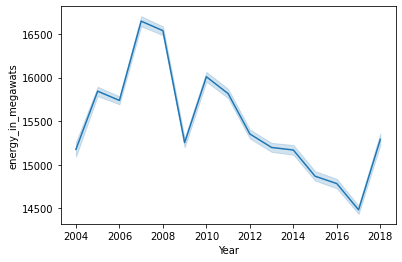

In [9]:
#*
sns.lineplot(x=data_frame['Year'],y=data_frame['energy_in_megawats'],data=data_frame)

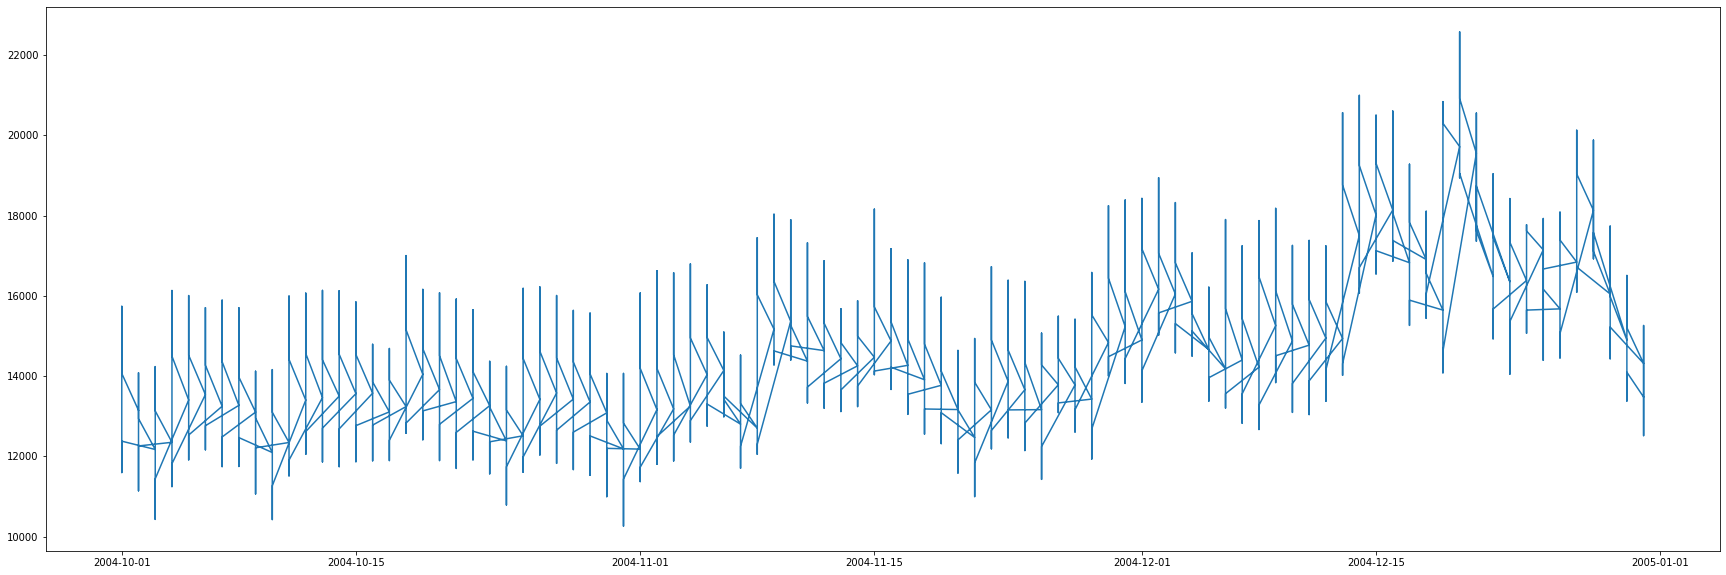

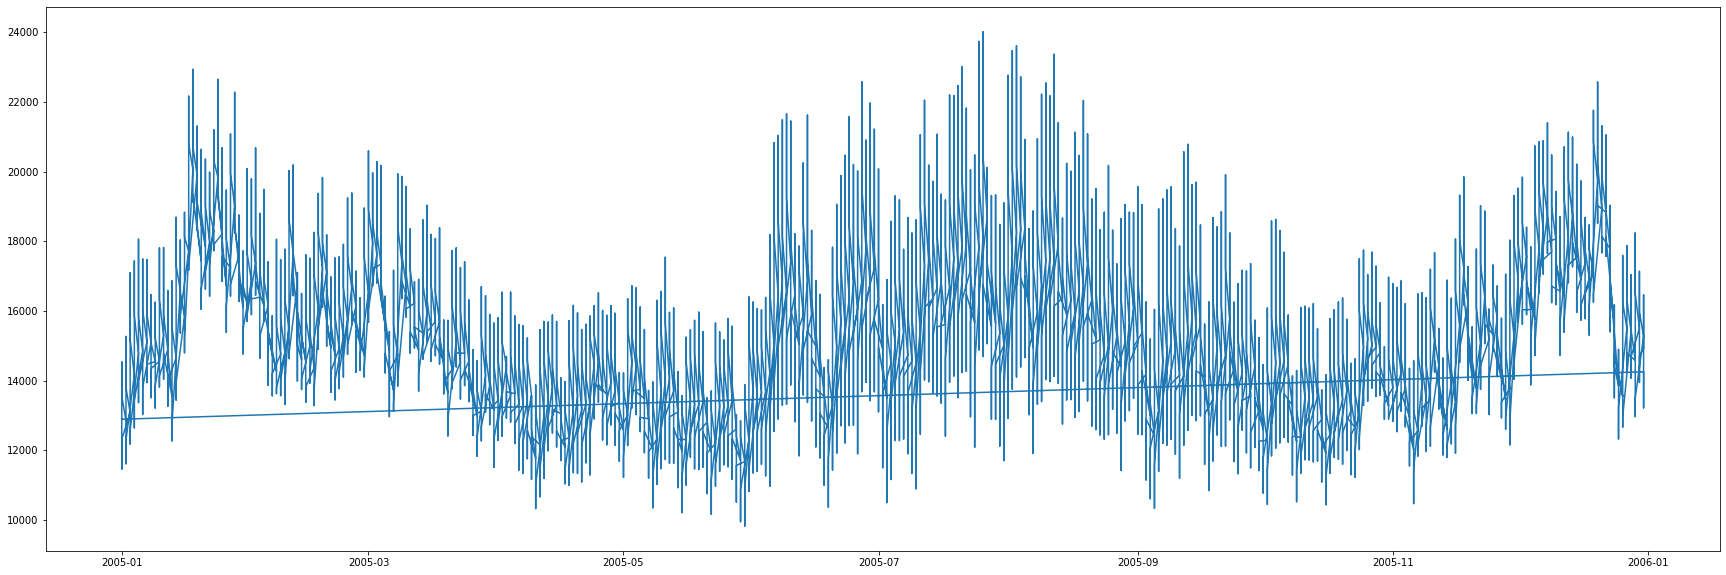

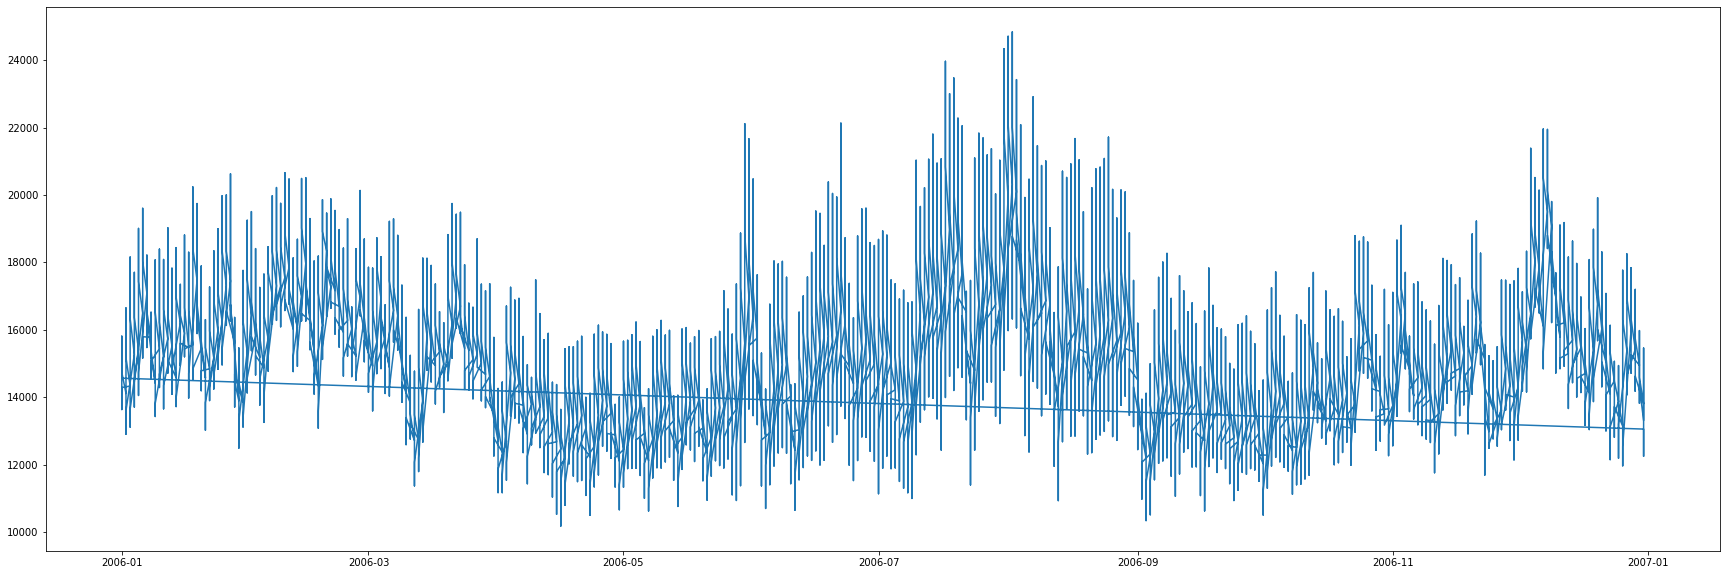

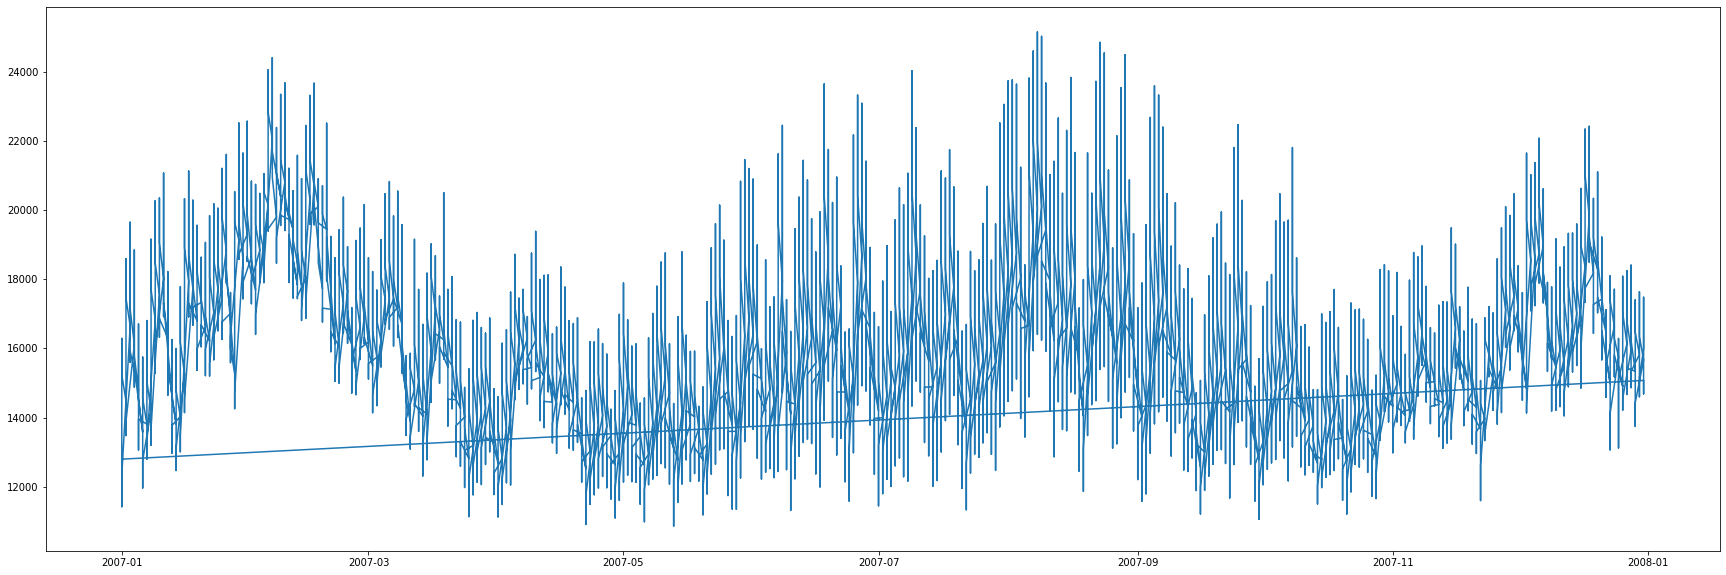

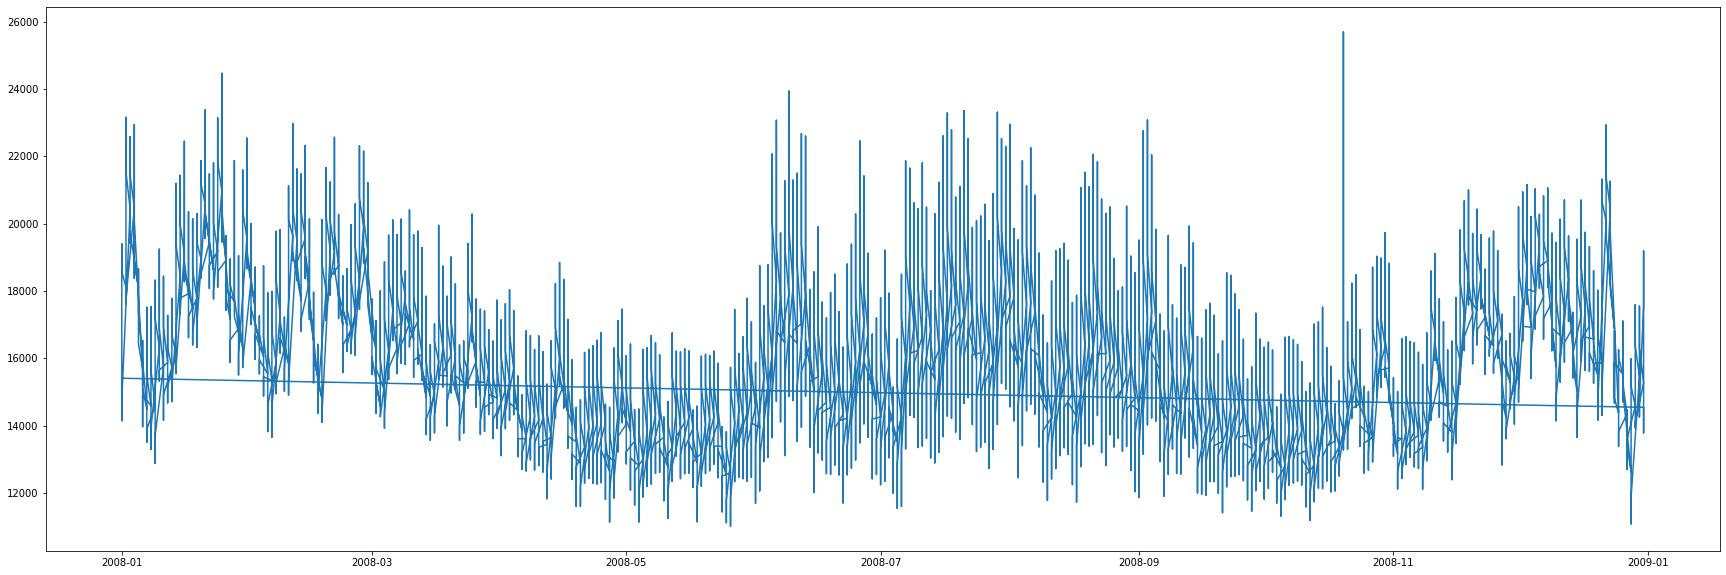

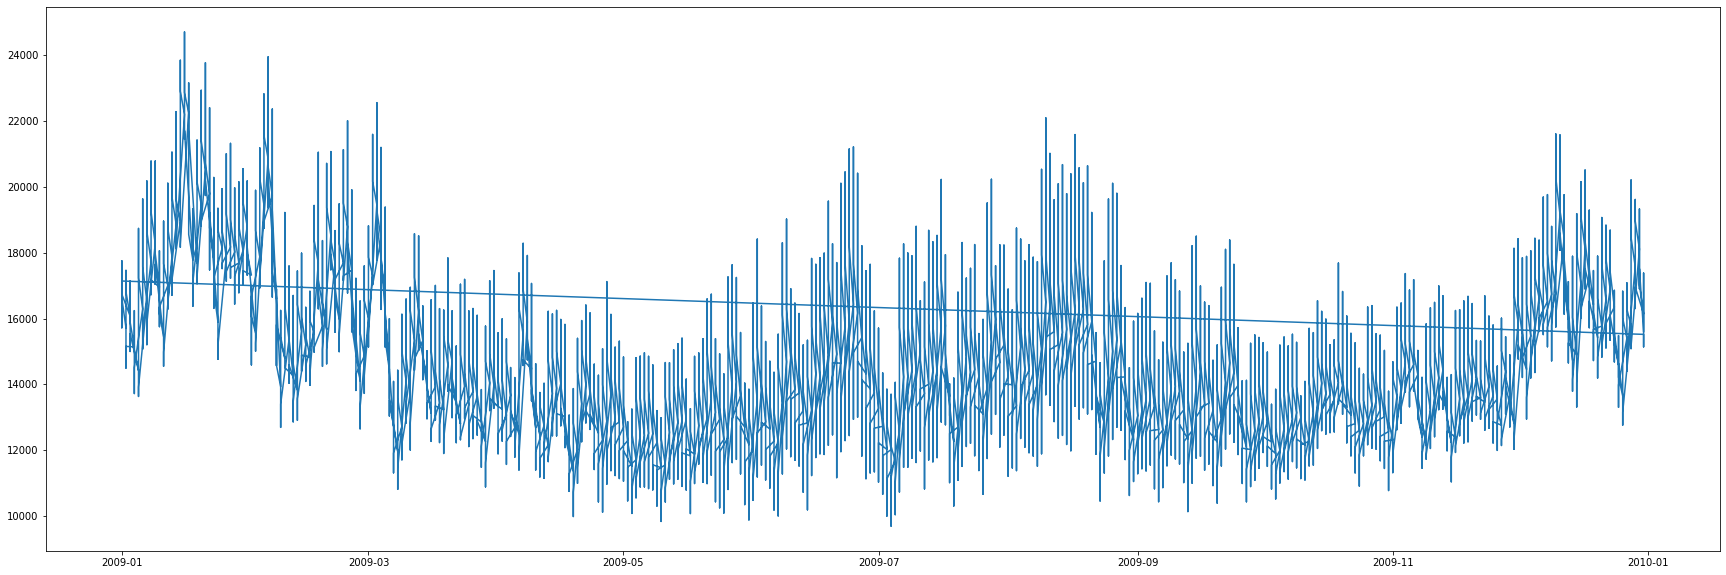

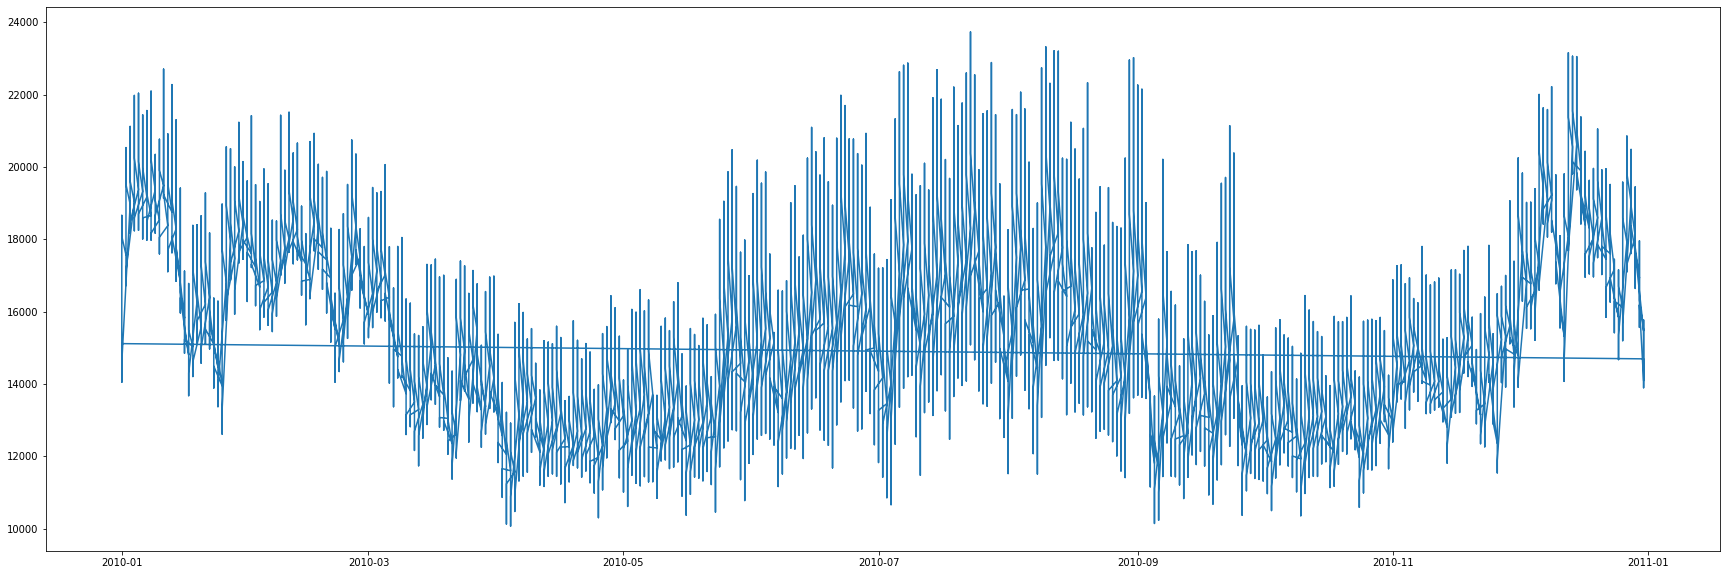

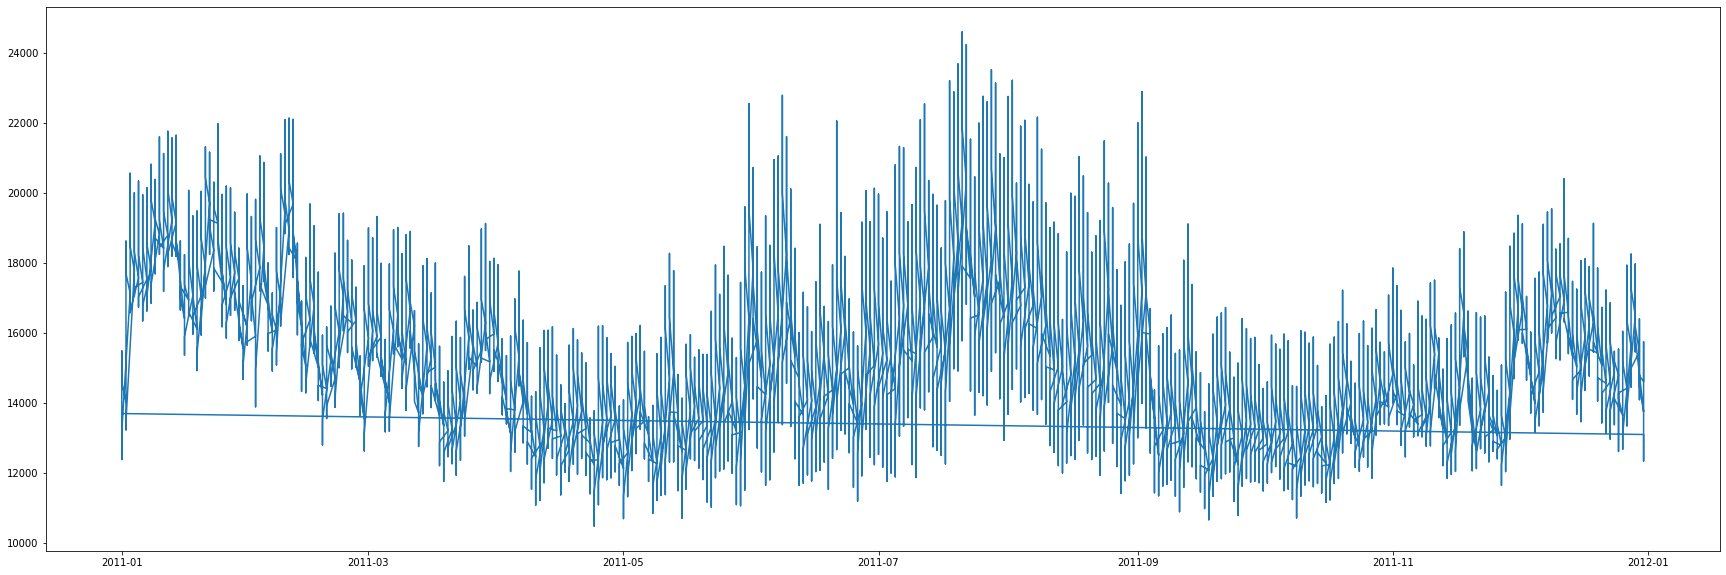

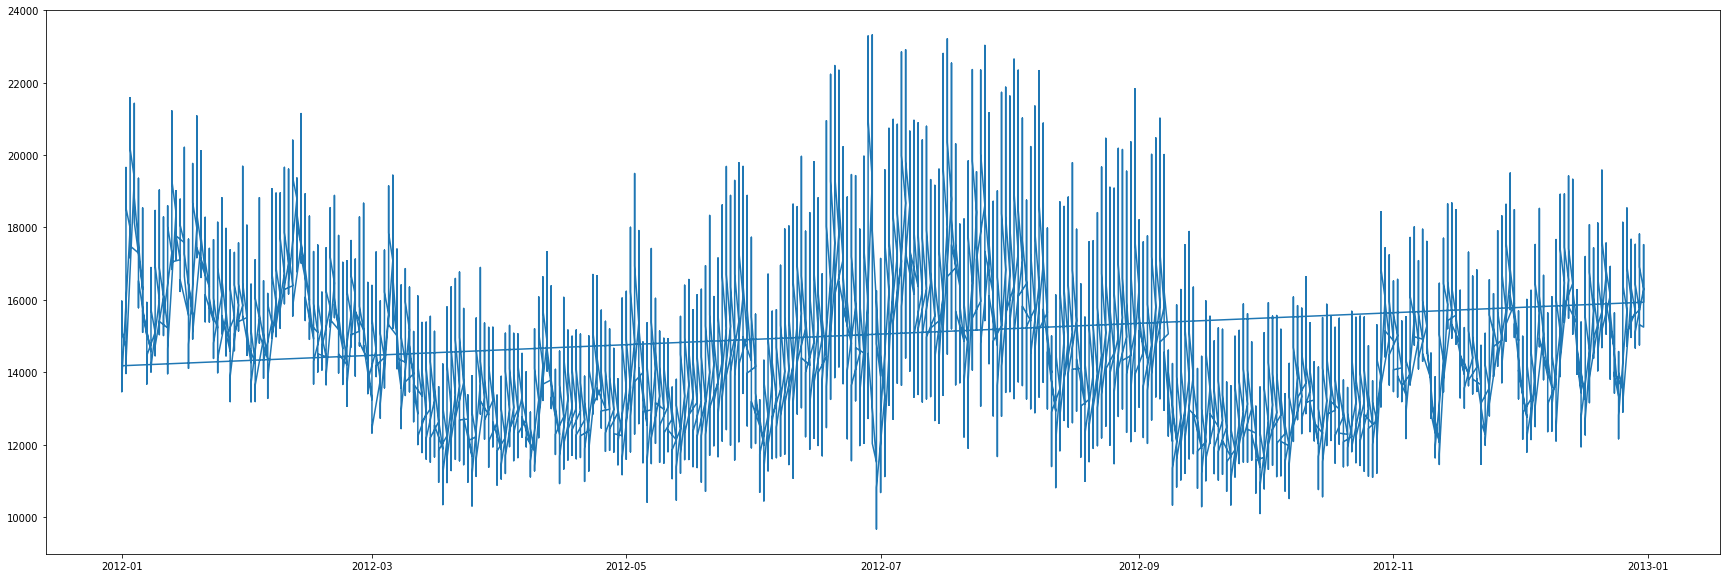

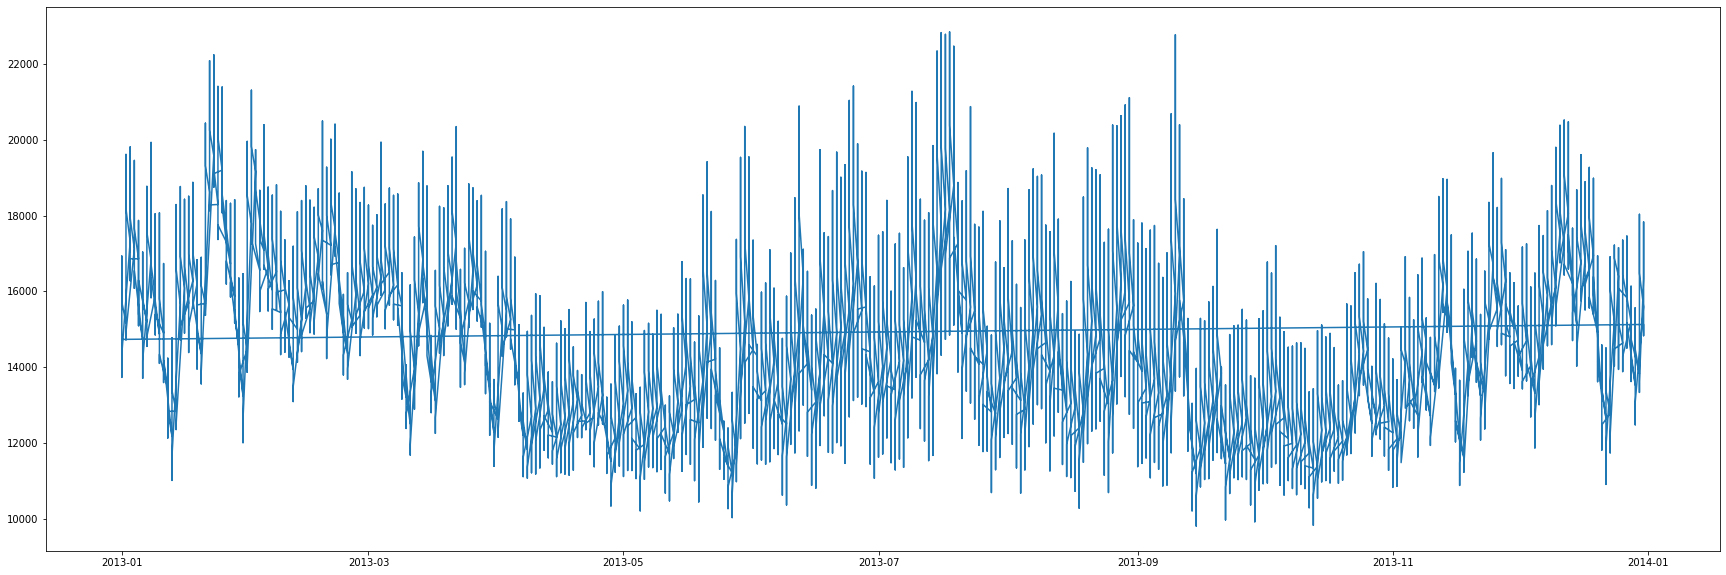

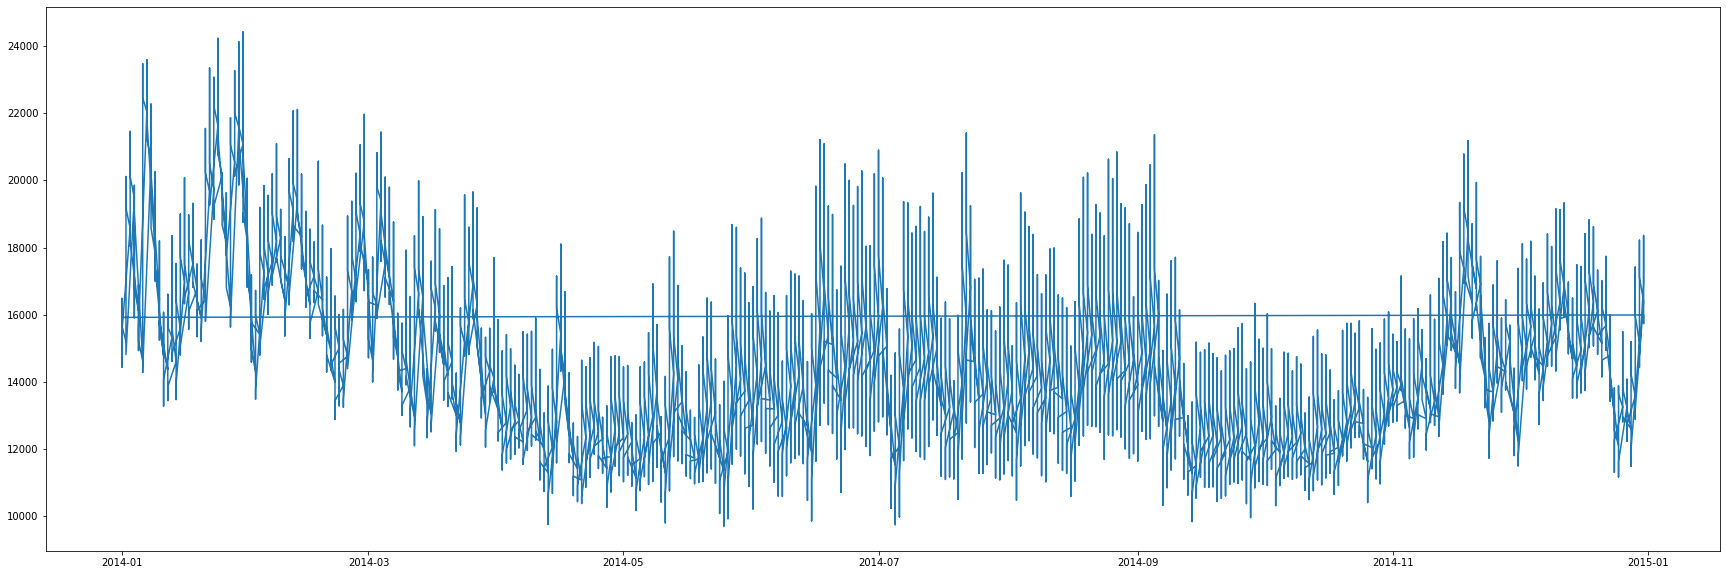

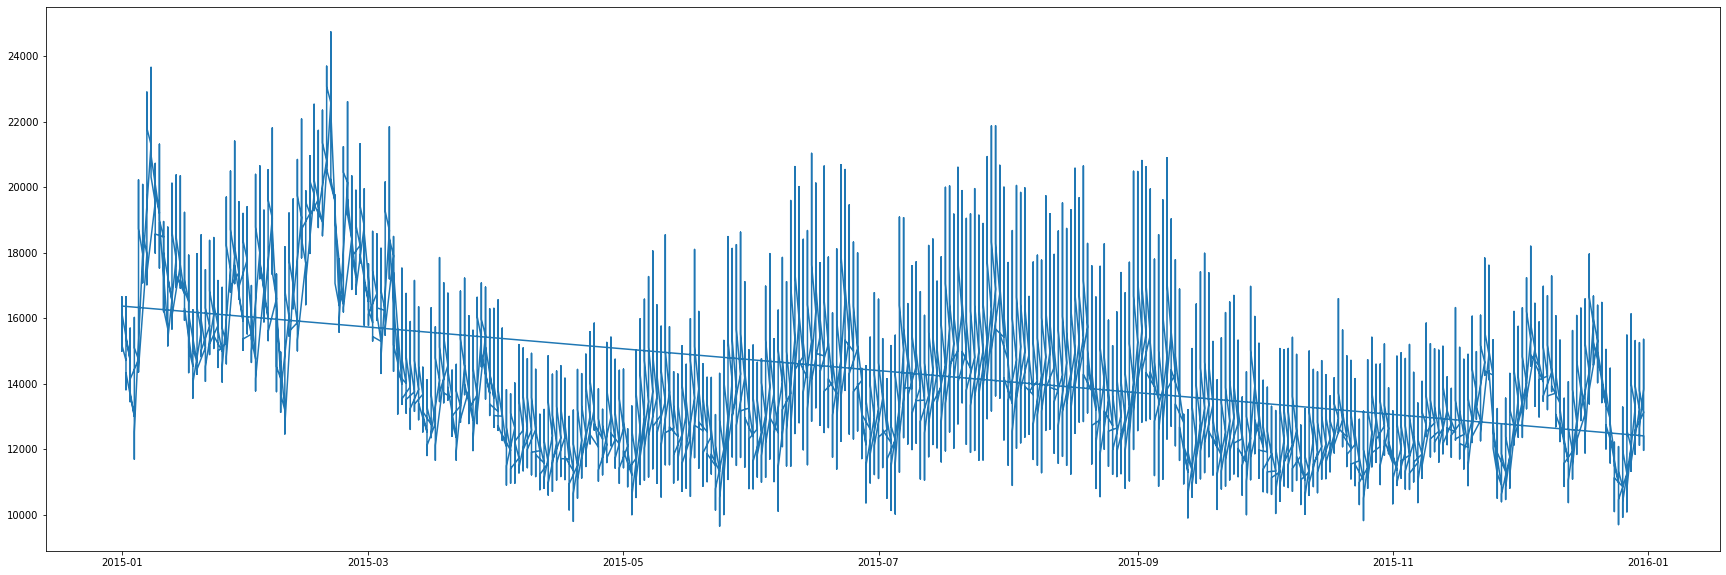

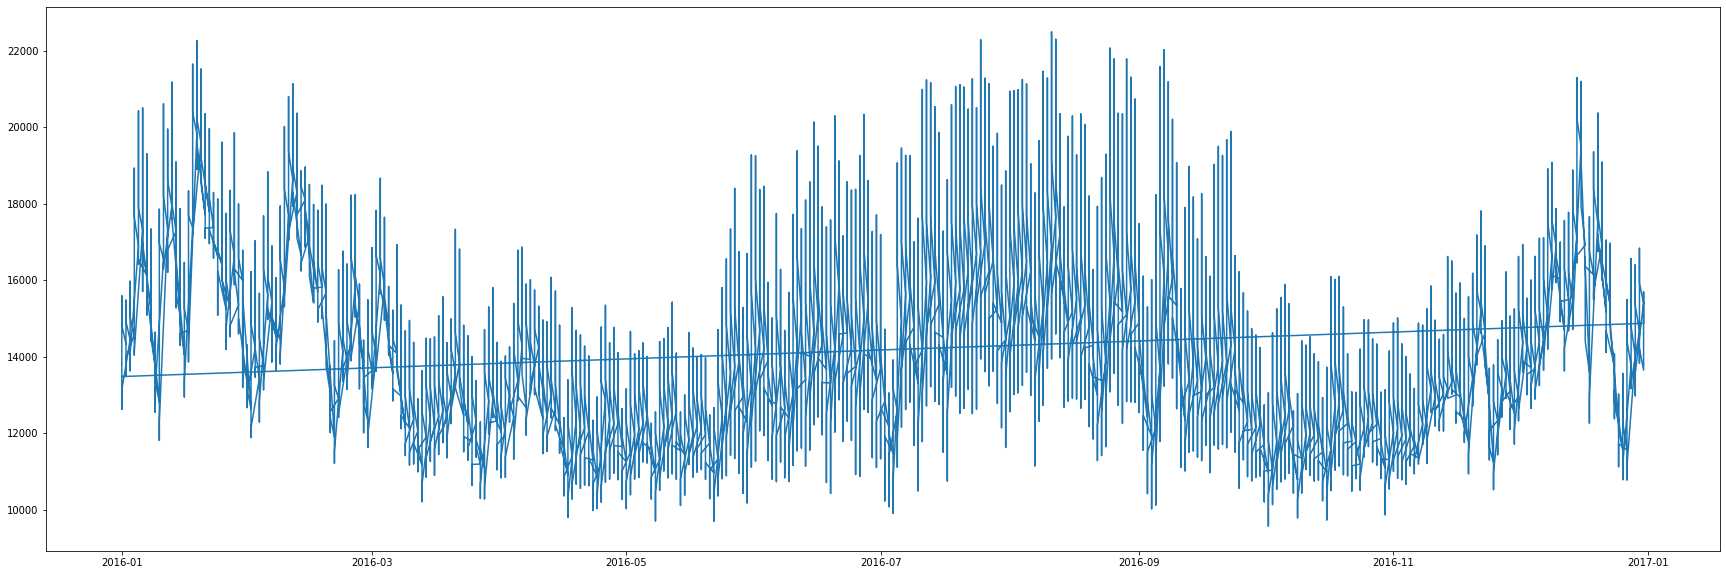

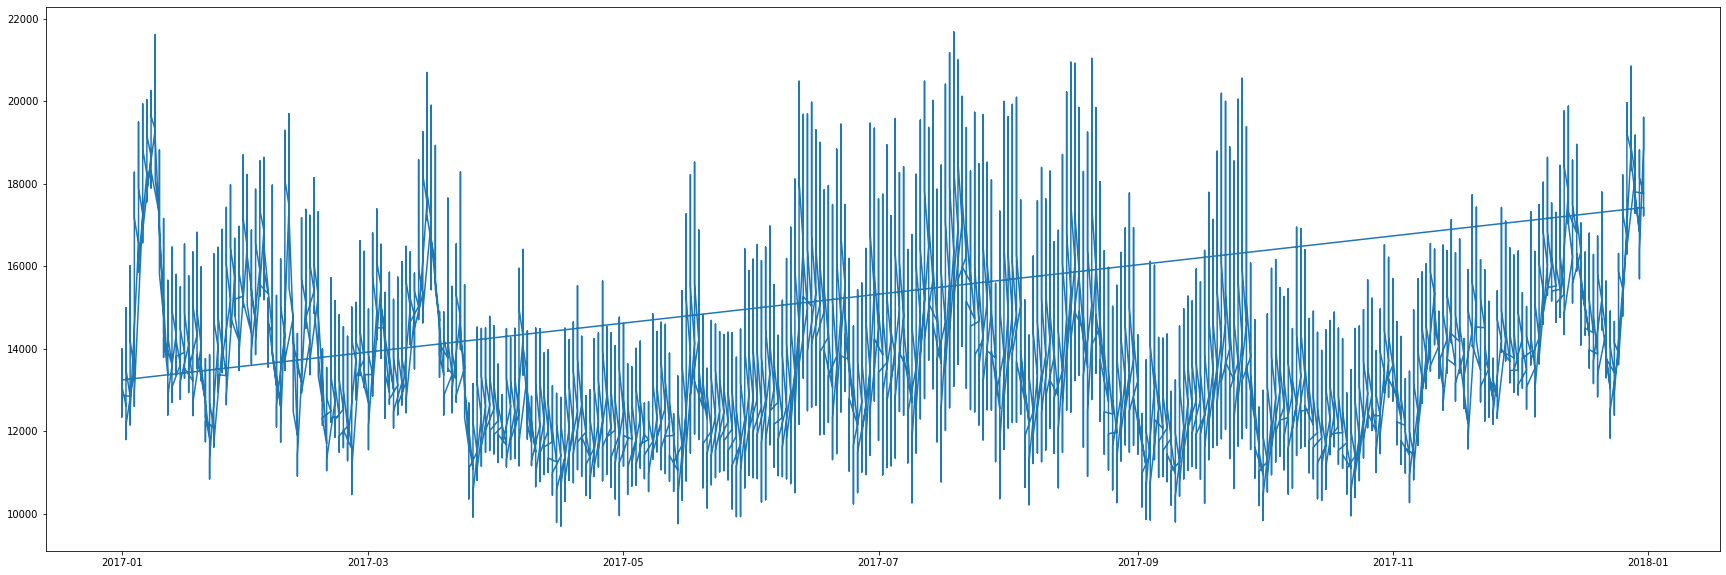

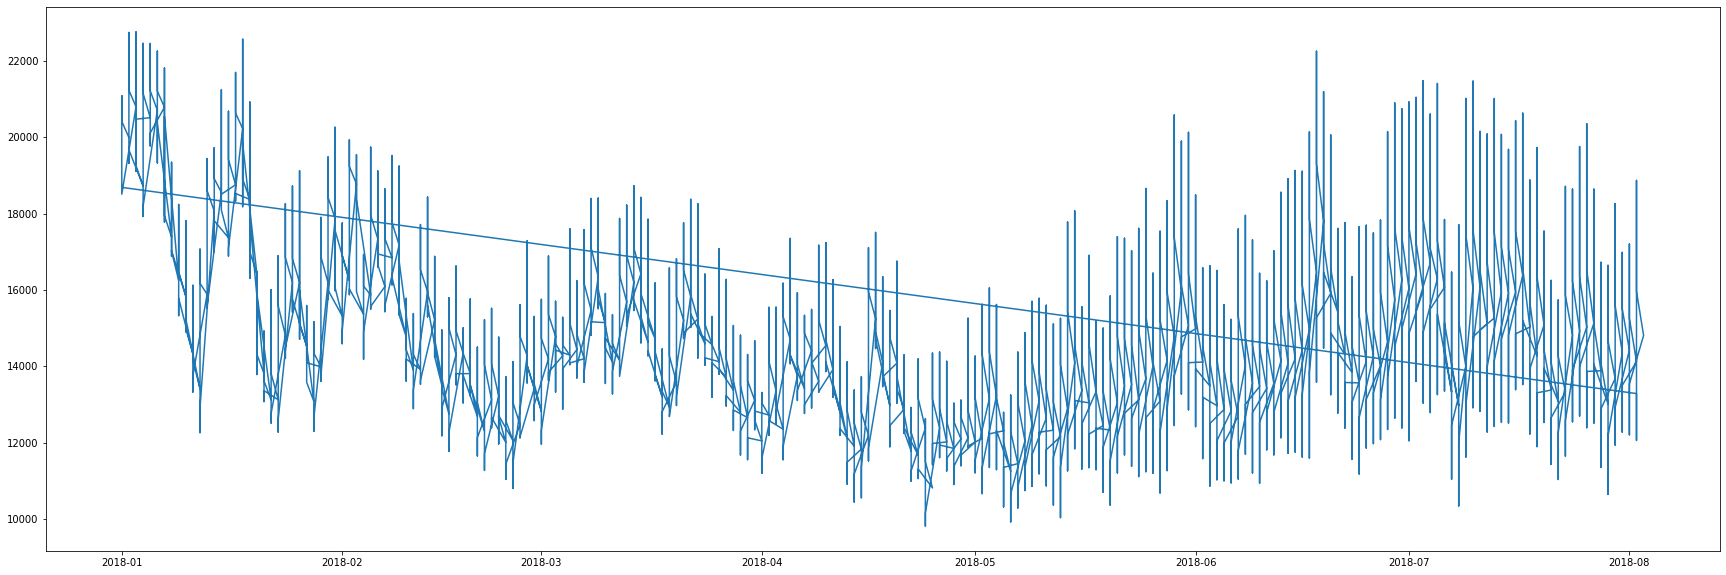

In [10]:
#yearly wise power consumption 
for i in data_frame['Year'].unique().tolist():
  k=data_frame[data_frame['Year']==i]
  plt.figure(figsize=(30,10))
  plt.plot(k['date'],k['energy_in_megawats'])

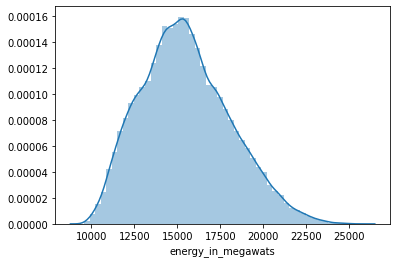

In [11]:
sns.distplot(data_frame['energy_in_megawats'])

Energy consumption by hours


In [12]:
timewise=data_frame['time'].astype(str).apply(lambda x: x.split(':')[0]).astype(str).astype(int)
datewise=data_frame['date'].astype(str).apply(lambda x: x.split('-')[2]).astype(str).astype(int)

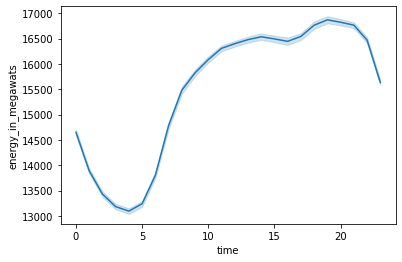

In [13]:
sns.lineplot(x=timewise,y=data_frame['energy_in_megawats'],data=data_frame)

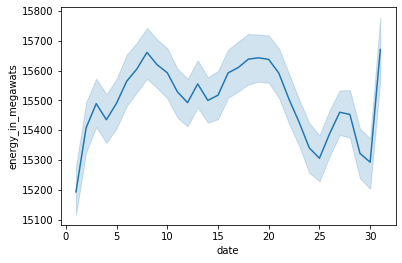

In [14]:
#energy consumption by dates in a month


sns.lineplot(x=datewise,y=data_frame['energy_in_megawats'],data=data_frame)

In [15]:
data_frame.head()

,Year,Month,date,time,week,energy_in_megawats
Datetime,,,,,,
2004-12-31 01:00:00,2004,12,2004-12-31,01:00:00,53,13478.0
2004-12-31 02:00:00,2004,12,2004-12-31,02:00:00,53,12865.0
2004-12-31 03:00:00,2004,12,2004-12-31,03:00:00,53,12577.0
2004-12-31 04:00:00,2004,12,2004-12-31,04:00:00,53,12517.0
2004-12-31 05:00:00,2004,12,2004-12-31,05:00:00,53,12670.0


In [16]:
data_frame.rename_axis(None,inplace=True)

In [17]:
# the purpose of doing these is it resample our data based on key that we provide i provided 'D' in the key ,so what it does is mean all the hours data of that day and give result
new=data_frame.resample('D').mean()

In [18]:
#so now dataframe of size 121273 converted into 5055 bcz(5055*24hours) 
new.head(),new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5055 entries, 2004-10-01 to 2018-08-03
Freq: D
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                5055 non-null   int64  
 1   Month               5055 non-null   int64  
 2   week                5055 non-null   int64  
 3   energy_in_megawats  5055 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 197.5 KB


(            Year  Month  week  energy_in_megawats
 2004-10-01  2004     10    40        14284.521739
 2004-10-02  2004     10    40        12999.875000
 2004-10-03  2004     10    40        12227.083333
 2004-10-04  2004     10    41        14309.041667
 2004-10-05  2004     10    41        14439.708333, None)

In [19]:
#split train and test
test=new.tail(100)
train=new.iloc[:,[3]]
train=train[:-100]

In [20]:
print(train.shape,test.shape)
train.head()

(4955, 1) (100, 4)


,energy_in_megawats
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333


In [21]:
#scale the values using min max scaler.
train=train.values
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
train=m.fit_transform(train)

Now we need to do moving average for every value ex:-(the current day energy consumption is based on trend of last 60 days of power consumption.

In [22]:
x_train,y_train=[],[]
for i in range(60,train.shape[0]):
  x_train.append(train[i-60:i])
  y_train.append(train[i])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape,y_train.shape

((4895, 60, 1), (4895, 1))

In [23]:
x_train=np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4895, 60, 1)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout

In [25]:
#1-input layer & 3 hidden layers & 1-output layers
classifier=Sequential()
classifier.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
classifier.add(Dropout(0.2))
classifier.add(LSTM(units=50,return_sequences=True))
classifier.add(Dropout(0.2))
classifier.add(LSTM(units=50,return_sequences=True))
classifier.add(Dropout(0.2))
classifier.add(LSTM(units=50))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1))
classifier.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
classifier.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
153/153 [==============================] - 14s 89ms/step - loss: 0.0230
Epoch 2/25
153/153 [==============================] - 14s 89ms/step - loss: 0.0183
Epoch 3/25
153/153 [==============================] - 14s 90ms/step - loss: 0.0175
Epoch 4/25
153/153 [==============================] - 14s 90ms/step - loss: 0.0165
Epoch 5/25
153/153 [==============================] - 14s 90ms/step - loss: 0.0161
Epoch 6/25
153/153 [==============================] - 14s 92ms/step - loss: 0.0155
Epoch 7/25
153/153 [==============================] - 14s 93ms/step - loss: 0.0155
Epoch 8/25
153/153 [==============================] - 14s 92ms/step - loss: 0.0150
Epoch 9/25
153/153 [==============================] - 14s 92ms/step - loss: 0.0136
Epoch 10/25
153/153 [==============================] - 14s 93ms/step - loss: 0.0117
Epoch 11/25
153/153 [==============================] - 14s 94ms/step - loss: 0.0103
Epoch 12/25
153/153 [==============================] - 14s 94ms/step - loss: 0.0095
E

Now we need to prepare the test data same way as train data 

In [27]:
df2=pd.concat((new[['energy_in_megawats']],test[['energy_in_megawats']]),axis=0,ignore_index=True)
df2.columns=['energy_in_megawats']
df2.shape

(5155, 1)

In [28]:
# taking 160 values to make moving average of for every 60 days 
inputs=df2[len(df2)-len(test)-60:].values
inputs.shape

(160, 1)

In [29]:
inputs.reshape(-1,1)
inputs=m.transform(inputs)
x_test=[]
for i in range(60,160):
  x_test.append(inputs[i-60:i])
x_test=np.array(x_test)
x_test=np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
# predict the values of estimated train data.
pred=classifier.predict(x_test)
pred=m.inverse_transform(pred)

In [30]:
t_mw=test['energy_in_megawats'].to_list()
pred_mw=pred
dates=test.index.tolist()

In [31]:
hundred=pd.DataFrame(data={'dates':dates,'t_mw':t_mw,'p_mw':[x[0] for x in pred_mw]})

In [32]:
#data frame for hundred  predicted values and  original values
hundred

,dates,t_mw,p_mw
0,2018-04-26,13157.791667,13968.801758
1,2018-04-27,12964.000000,13691.198242
2,2018-04-28,12237.583333,14497.325195
3,2018-04-29,12156.791667,13575.921875
4,2018-04-30,13443.500000,13340.442383
...,...,...,...
95,2018-07-30,15368.083333,15046.272461
96,2018-07-31,15180.291667,16021.822266
97,2018-08-01,15151.166667,15324.891602
98,2018-08-02,15687.666667,15204.368164


Text(0, 0.5, 'power consumption in megawats')

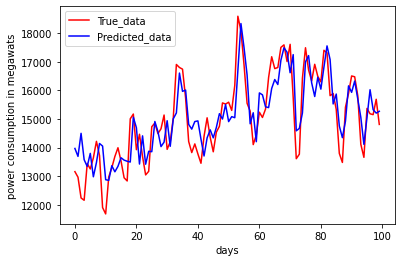

In [34]:
#plot a line plot for seeing difference
plt.plot(hundred['t_mw'],'r',label='True_data')
plt.plot(hundred['p_mw'],'b',label='Predicted_data')
plt.legend()
plt.xlabel("days")
plt.ylabel("power consumption in megawats")